# CVaR-QRDQN Demo

This notebook demonstrates the training and evaluation of the CVaR-QRDQN model on the CartPole-v1 environment.

In [7]:
# -*- coding: utf-8 -*-
"""
Training script for CVaR-QRDQN
"""

import os
os.chdir(r'G:\我的雲端硬碟\Academic\PhD\Projects\RL Demo\CVaR-QRDQN')
import numpy as np
import torch
import matplotlib.pyplot as plt
from environment import create_environment
from agent import Agent
from evaluate import evaluate

env_name = "CartPole-v1"
num_episodes = 1000
max_steps = 500
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 0.995
lr = 0.001
gamma = 0.99

Training the DQN model...
Episode 1/1000, Total Reward: 11.0
Episode 2/1000, Total Reward: 23.0
Episode 3/1000, Total Reward: 21.0
Episode 4/1000, Total Reward: 16.0
Episode 5/1000, Total Reward: 11.0
Episode 6/1000, Total Reward: 16.0
Episode 7/1000, Total Reward: 16.0
Episode 8/1000, Total Reward: 17.0
Episode 9/1000, Total Reward: 74.0
Episode 10/1000, Total Reward: 15.0
Episode 11/1000, Total Reward: 19.0
Episode 12/1000, Total Reward: 18.0
Episode 13/1000, Total Reward: 26.0
Episode 14/1000, Total Reward: 19.0
Episode 15/1000, Total Reward: 35.0
Episode 16/1000, Total Reward: 40.0
Episode 17/1000, Total Reward: 15.0
Episode 18/1000, Total Reward: 9.0
Episode 19/1000, Total Reward: 16.0
Episode 20/1000, Total Reward: 14.0
Episode 21/1000, Total Reward: 22.0
Episode 22/1000, Total Reward: 11.0
Episode 23/1000, Total Reward: 28.0
Episode 24/1000, Total Reward: 16.0
Episode 25/1000, Total Reward: 16.0
Episode 26/1000, Total Reward: 14.0
Episode 27/1000, Total Reward: 14.0
Episode 28/1

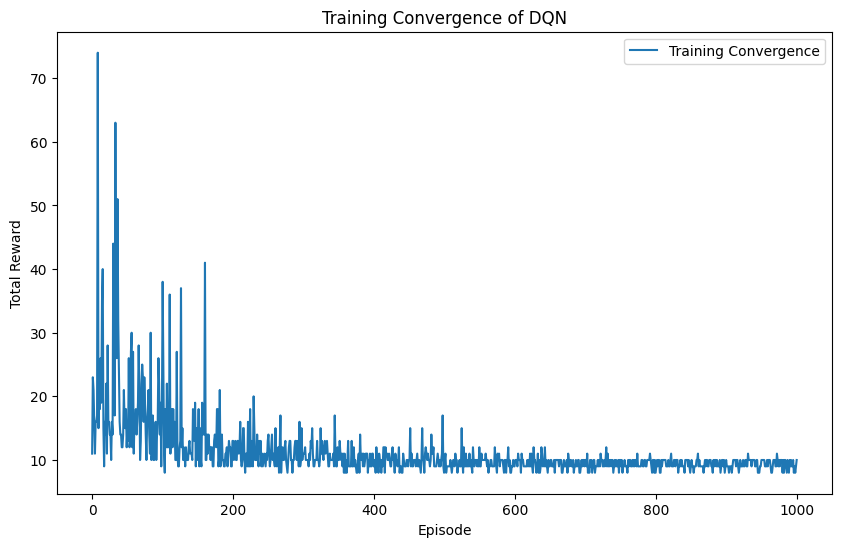

Evaluating the DQN model...
Episode 1/10, Reward: 8.0
Episode 2/10, Reward: 10.0
Episode 3/10, Reward: 10.0
Episode 4/10, Reward: 8.0
Episode 5/10, Reward: 8.0
Episode 6/10, Reward: 10.0
Episode 7/10, Reward: 10.0
Episode 8/10, Reward: 9.0
Episode 9/10, Reward: 10.0
Episode 10/10, Reward: 8.0


In [ ]:
def train(env_name, num_episodes, max_steps, epsilon_start, epsilon_end, epsilon_decay, lr, gamma, cvar_alpha, num_quantiles):
    env = create_environment(env_name)
    agent = Agent(env.observation_space.shape[0], env.action_space.n, num_quantiles, lr, gamma, cvar_alpha)

    epsilon = epsilon_start
    convergence = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0

        for step in range(max_steps):
            action = agent.select_action(state, epsilon)
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            
            states, actions, rewards, next_states, dones = \
                np.array(state)[np.newaxis, :], np.array([action])[np.newaxis, :], np.array([reward])[np.newaxis, :], np.array(next_state)[np.newaxis, :], np.array([done], dtype=np.bool_)[np.newaxis, :]
            agent.update(batch=(states, actions, rewards, next_states, dones))

            state = next_state
            if done:
                break

        epsilon = max(epsilon_end, epsilon * epsilon_decay)
        print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")

        convergence.append(total_reward)

    # Plot the convergence
    plt.figure(figsize=(10, 6))
    plt.plot(convergence, label='Training Convergence')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Training Convergence of DQN')
    plt.legend()
    plt.show()
    
    # Save the model
    torch.save(agent.model.state_dict(), "dqn_model.pth")

if __name__ == "__main__":
    cvar_alpha = 1 # dummy value
    num_quantiles = 1

    # Train the model
    print("Training the DQN model...")
    train(env_name, num_episodes, max_steps, epsilon_start, epsilon_end, epsilon_decay, lr, gamma, cvar_alpha, num_quantiles)

    # Evaluate the model
    model_path = "dqn_model.pth"
    num_eval_episodes = 10
    print("Evaluating the DQN model...")
    evaluate(env_name, model_path, num_eval_episodes, max_steps, num_quantiles)

    # Create environment and agent
    env = create_environment(env_name)
    dqn_agent = Agent(env.observation_space.shape[0], env.action_space.n, num_quantiles, lr, gamma, cvar_alpha)
    dqn_agent.model.load_state_dict(torch.load(model_path, weights_only=True))



Training the CVaR-QRDQN model...
Episode 1/1000, Total Reward: 13.0
Episode 2/1000, Total Reward: 19.0
Episode 3/1000, Total Reward: 16.0
Episode 4/1000, Total Reward: 34.0
Episode 5/1000, Total Reward: 13.0
Episode 6/1000, Total Reward: 20.0
Episode 7/1000, Total Reward: 16.0
Episode 8/1000, Total Reward: 16.0
Episode 9/1000, Total Reward: 20.0
Episode 10/1000, Total Reward: 13.0
Episode 11/1000, Total Reward: 10.0
Episode 12/1000, Total Reward: 19.0
Episode 13/1000, Total Reward: 15.0
Episode 14/1000, Total Reward: 25.0
Episode 15/1000, Total Reward: 11.0
Episode 16/1000, Total Reward: 39.0
Episode 17/1000, Total Reward: 14.0
Episode 18/1000, Total Reward: 25.0
Episode 19/1000, Total Reward: 20.0
Episode 20/1000, Total Reward: 14.0
Episode 21/1000, Total Reward: 46.0
Episode 22/1000, Total Reward: 23.0
Episode 23/1000, Total Reward: 15.0
Episode 24/1000, Total Reward: 43.0
Episode 25/1000, Total Reward: 14.0
Episode 26/1000, Total Reward: 26.0
Episode 27/1000, Total Reward: 24.0
Epis

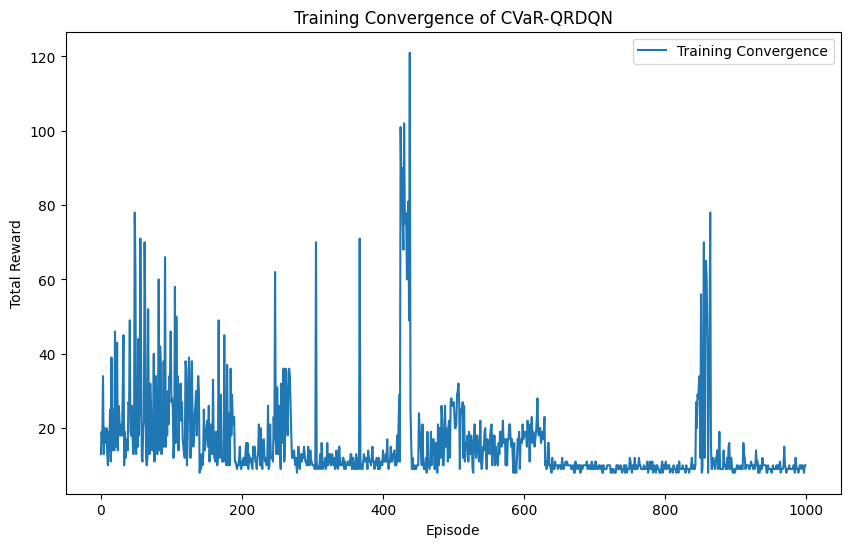

Evaluating the CVaR-QRDQN model...
Episode 1/10, Reward: 10.0
Episode 2/10, Reward: 9.0
Episode 3/10, Reward: 9.0
Episode 4/10, Reward: 10.0
Episode 5/10, Reward: 10.0
Episode 6/10, Reward: 10.0
Episode 7/10, Reward: 9.0
Episode 8/10, Reward: 10.0
Episode 9/10, Reward: 10.0
Episode 10/10, Reward: 9.0


In [16]:
def train(env_name, num_episodes, max_steps, epsilon_start, epsilon_end, epsilon_decay, lr, gamma, cvar_alpha, num_quantiles):
    env = create_environment(env_name)
    agent = Agent(env.observation_space.shape[0], env.action_space.n, num_quantiles, lr, gamma, cvar_alpha)

    epsilon = epsilon_start
    convergence = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0

        for step in range(max_steps):
            action = agent.select_action(state, epsilon)
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            
            states, actions, rewards, next_states, dones = \
                np.array(state)[np.newaxis, :], np.array([action])[np.newaxis, :], np.array([reward])[np.newaxis, :], np.array(next_state)[np.newaxis, :], np.array([done], dtype=np.bool_)[np.newaxis, :]
            agent.update(batch=(states, actions, rewards, next_states, dones))

            state = next_state
            if done:
                break

        epsilon = max(epsilon_end, epsilon * epsilon_decay)
        print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")

        convergence.append(total_reward)

    # Plot the convergence
    plt.figure(figsize=(10, 6))
    plt.plot(convergence, label='Training Convergence')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Training Convergence of CVaR-QRDQN')
    plt.legend()
    plt.show()

    # Save the model
    torch.save(agent.model.state_dict(), "cvar_qrdqn_model.pth")

if __name__ == "__main__":
    cvar_alpha = 0.1
    num_quantiles = 50

    # Train the model
    print("Training the CVaR-QRDQN model...")
    train(env_name, num_episodes, max_steps, epsilon_start, epsilon_end, epsilon_decay, lr, gamma, cvar_alpha, num_quantiles)

    # Evaluate the model
    model_path = "cvar_qrdqn_model.pth"
    num_eval_episodes = 10
    print("Evaluating the CVaR-QRDQN model...")
    evaluate(env_name, model_path, num_eval_episodes, max_steps, num_quantiles)

    # Create environment and agent
    env = create_environment(env_name)
    cvar_qrdqn_agent = Agent(env.observation_space.shape[0], env.action_space.n, num_quantiles, lr, gamma, cvar_alpha)
    cvar_qrdqn_agent.model.load_state_dict(torch.load(model_path, weights_only=True))



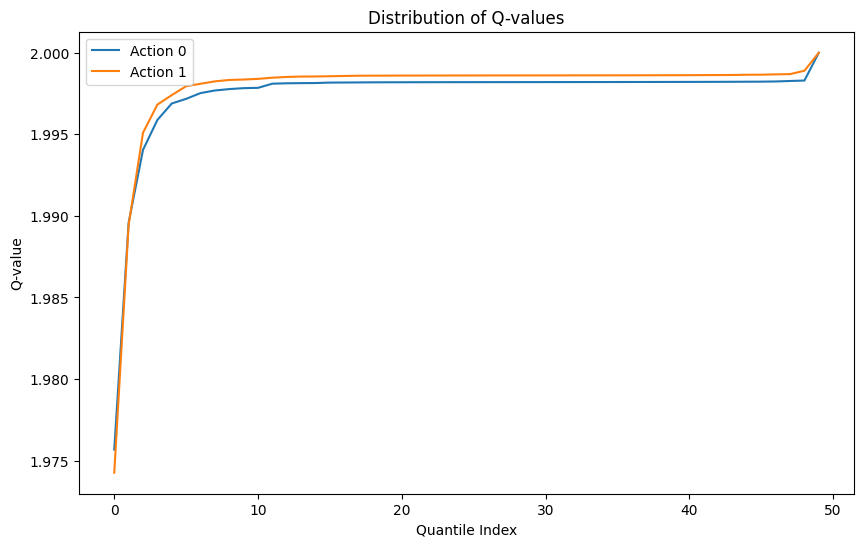

In [10]:
# Display Q-values for a sample state
state, info = env.reset()
state_tensor = torch.FloatTensor(state).unsqueeze(0)

quantiles = cvar_qrdqn_agent.model(state_tensor)
# q_values = quantiles.mean(dim=-1).detach().numpy()
# print("Q-values for the sample state:", q_values)

# Plot the distribution of Q-values
plt.figure(figsize=(10, 6))
for action in range(env.action_space.n):
    plt.plot(quantiles[0, action, :].detach().numpy(), label=f'Action {action}')
plt.xlabel('Quantile Index')
plt.ylabel('Q-value')
plt.title('Distribution of Q-values')
plt.legend()
plt.show()

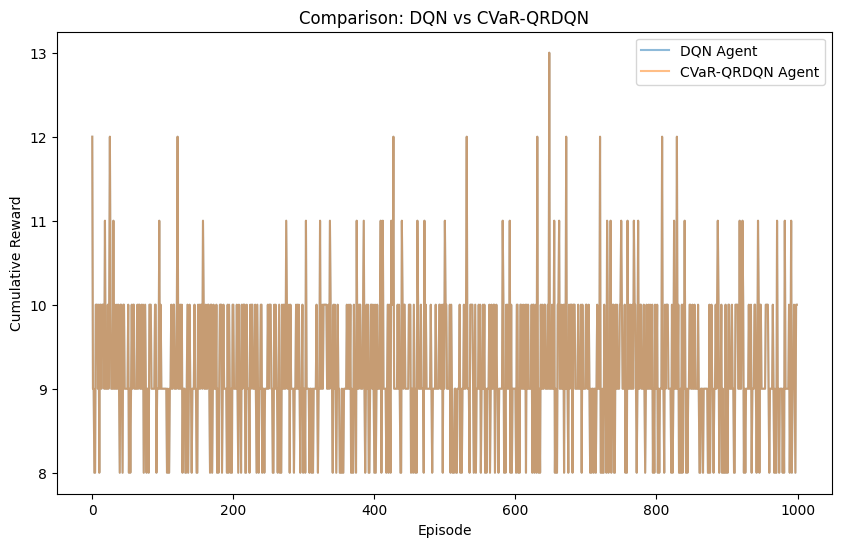

In [11]:

import matplotlib.pyplot as plt

dqn_rewards = []
cvar_rewards = []

for episode in range(num_episodes):
    # Reset environment
    dqn_env = create_environment(env_name)
    cvar_env = create_environment(env_name)
    dqn_state, _ = dqn_env.reset()
    cvar_state, _ = cvar_env.reset()
    dqn_total_reward = 0
    cvar_total_reward = 0
    
    for step in range(max_steps):
        # DQN agent step
        dqn_action = dqn_agent.select_action(dqn_state, epsilon=0.1)
        next_state, dqn_reward, dqn_done, dqn_truncated, _ = dqn_env.step(dqn_action)
        dqn_total_reward += dqn_reward
        states, actions, rewards, next_states, dones = \
            np.array(state)[np.newaxis, :], np.array([dqn_action])[np.newaxis, :], np.array([dqn_reward])[np.newaxis, :], np.array(next_state)[np.newaxis, :], np.array([(dqn_done or dqn_truncated)], dtype=np.bool_)[np.newaxis, :]
        dqn_agent.update(batch=(states, actions, rewards, next_states, dones))

        # CVaR-QRDQN agent step
        cvar_action = cvar_qrdqn_agent.select_action(cvar_state, epsilon=0.1)  # or some epsilon value
        next_state_cvar, cvar_reward, cvar_done, cvar_truncated, _ = cvar_env.step(cvar_action)
        cvar_total_reward += cvar_reward
        states, actions, rewards, next_states, dones = \
            np.array(state)[np.newaxis, :], np.array([cvar_action])[np.newaxis, :], np.array([cvar_reward])[np.newaxis, :], np.array(next_state)[np.newaxis, :], np.array([(cvar_done or cvar_truncated)], dtype=np.bool_)[np.newaxis, :]
        cvar_qrdqn_agent.update(batch=(states, actions, rewards, next_states, dones))

        # Move to the next state (shared environment example)
        state = next_state

        # Stop if either agent's episode ended
        if dqn_done or dqn_truncated or cvar_done or cvar_truncated:
            break

    dqn_rewards.append(dqn_total_reward)
    cvar_rewards.append(cvar_total_reward)



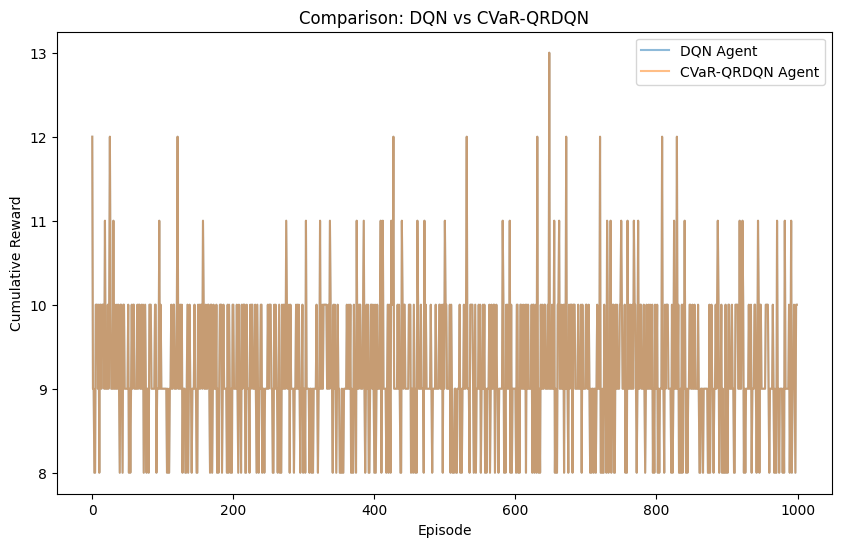

In [15]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(dqn_rewards, alpha=0.5, label='DQN Agent')
plt.plot(cvar_rewards, alpha=0.5, label='CVaR-QRDQN Agent')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Comparison: DQN vs CVaR-QRDQN')
plt.legend()
plt.show()

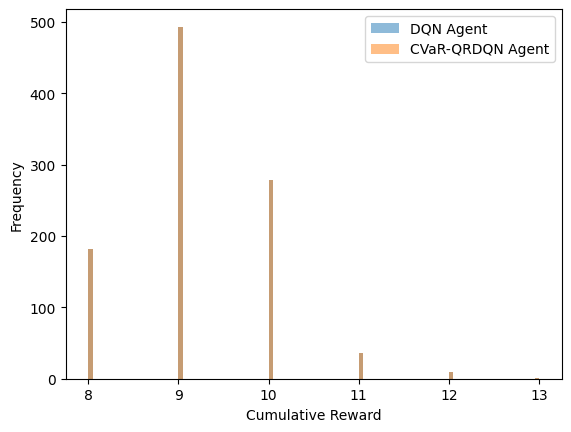

In [12]:
bins = 100

plt.hist(dqn_rewards, bins, alpha=0.5, label='DQN Agent')
plt.hist(cvar_rewards, bins, alpha=0.5, label='CVaR-QRDQN Agent')
plt.xlabel('Cumulative Reward')
plt.ylabel('Frequency')
plt.legend()
plt.show()